In [1]:
import os
import numpy as np
from PIL import Image

# 1. Definimos la ruta en tu usuario de Windows
base_dir = os.path.join(os.path.expanduser("~"), "DatasetAnimales")

# 2. Definimos las 5 clases nuevas
categorias = ['perro', 'gato', 'tortuga', 'mariquita', 'hormiga']

# 3. Creamos carpetas y generamos 30 imágenes de prueba por cada animal
for cat in categorias:
    path = os.path.join(base_dir, cat)
    os.makedirs(path, exist_ok=True)
    print(f"Creando carpeta: {path}")
    
print("\n¡Dataset de Animales listo!")
print(f"Ruta para el código: {base_dir}")

Creando carpeta: C:\Users\aleja\DatasetAnimales\perro
Creando carpeta: C:\Users\aleja\DatasetAnimales\gato
Creando carpeta: C:\Users\aleja\DatasetAnimales\tortuga
Creando carpeta: C:\Users\aleja\DatasetAnimales\mariquita
Creando carpeta: C:\Users\aleja\DatasetAnimales\hormiga

¡Dataset de Animales listo!
Ruta para el código: C:\Users\aleja\DatasetAnimales


In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Leer imágenes 

Este código está diseñado para recorrer un directorio específico y sus subdirectorios, leer todas las imágenes con extensiones .jpg, .jpeg, .png, .bmp, o .tiff, y almacenar información sobre estas imágenes y los directorios donde se encuentran.

In [2]:
import os
import re
import matplotlib.pyplot as plt
from skimage.transform import resize # Necesario para ajustar tamaños

# 1. Apuntamos a tu carpeta de Windows
dirname = os.path.join(os.path.expanduser("~"), "DatasetAnimales")
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("Leyendo imágenes de ", imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            
            # Leemos la imagen
            image = plt.imread(filepath)
            
            image_resized = resize(image, (50, 50, 3), anti_aliasing=True, clip=False, preserve_range=True)
            
            images.append(image_resized)
            cant += 1
            
            if prevRoot != root:
                print(root, cant)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0

dircount.append(cant)
dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio", dircount)
print('Suma Total de imágenes en subdirs:', sum(dircount))

<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
C:\Users\aleja\AppData\Local\Temp\ipykernel_21808\2714754823.py:20: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


Leyendo imágenes de  C:\Users\aleja\DatasetAnimales\
C:\Users\aleja\DatasetAnimales\gato 1
C:\Users\aleja\DatasetAnimales\hormiga 12138
C:\Users\aleja\DatasetAnimales\mariquita 9986
C:\Users\aleja\DatasetAnimales\perro 10148
C:\Users\aleja\DatasetAnimales\tortuga 13812
Directorios leídos: 5
Imágenes en cada directorio [12139, 9986, 10148, 13812, 9971]
Suma Total de imágenes en subdirs: 56056


# Generación de Etiquetas 

Esta sección del código está asignando una etiqueta numérica a cada imagen basada en el directorio del que proviene. Si un directorio tiene 5 imágenes, todas esas imágenes tendrán la misma etiqueta (por ejemplo, 0), y luego la etiqueta cambiará para el próximo directorio. Esto es útil para clasificar las imágenes según sus directorios de origen.

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  56056


Esta sección del código permite identificar y almacenar los nombres de los subdirectorios de manera organizada, lo cual puede ser útil para el análisis posterior o para referenciar los datos procesados.

In [4]:
sriesgos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    sriesgos.append(name[len(name)-1])
    indice=indice+1

0 gato
1 hormiga
2 mariquita
3 perro
4 tortuga


Esta sección del código convierte las listas de etiquetas e imágenes en arreglos de NumPy para facilitar su manipulación. Luego, identifica las clases únicas presentes en las etiquetas y calcula el número total de clases, imprimiendo esta información. Esto es útil para entender la distribución de las clases en el conjunto de datos y preparar los datos para análisis o entrenamiento de modelos.

In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


Esta sección del código divide el conjunto de datos en dos partes: datos de entrenamiento (80%) y datos de prueba (20%). Luego, imprime las dimensiones de estos conjuntos de datos. Esta división es crucial en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático, ya que permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (44844, 50, 50, 3) (44844,)
Testing data shape :  (11212, 50, 50, 3) (11212,)


Esta sección del código utiliza Matplotlib para mostrar las primeras imágenes de los conjuntos de datos de entrenamiento y de prueba, junto con sus etiquetas correspondientes.

Text(0.5, 1.0, 'Ground Truth : 2')

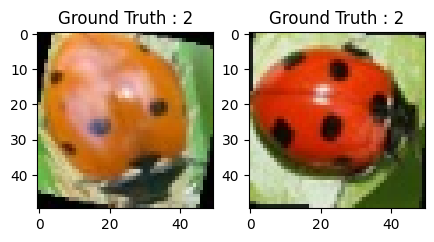

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Esta sección del código convierte los datos de imágenes a tipo de dato float32 y normaliza los valores de píxel para que estén en el rango [0, 1]. Luego, visualiza una imagen del conjunto de datos de prueba. La normalización es crucial para el entrenamiento efectivo de modelos de aprendizaje automático.

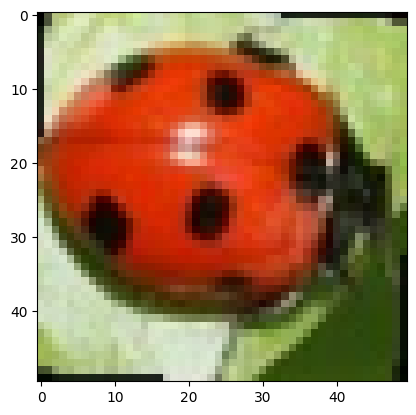

In [9]:
rain_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

Esta sección del código convierte las etiquetas de clase en formato entero a un formato de codificación one-hot. Esto es importante porque muchos algoritmos de aprendizaje automático, especialmente las redes neuronales, funcionan mejor con etiquetas en formato one-hot. Luego, se imprime una etiqueta antes y después de la conversión para verificar el proceso.

In [10]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


Esta sección del código toma el conjunto de datos de entrenamiento y lo divide en dos conjuntos: uno para continuar el entrenamiento y otro para la validación. La validación es una parte crucial del proceso de entrenamiento de modelos de aprendizaje automático porque permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, ayudando a prevenir el sobreajuste.

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

Esta sección del código es útil para verificar que los conjuntos de datos se han dividido correctamente y que las formas de los datos son las esperadas. Esto asegura que los datos estén listos para ser utilizados en el entrenamiento y validación del modelo.

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(35875, 50, 50, 3) (8969, 50, 50, 3) (35875, 5) (8969, 5)


Esta sección del código define y configura varios parámetros importantes para el entrenamiento de una red neuronal. Estos parámetros incluyen la tasa de aprendizaje inicial, el número de épocas y el tamaño del lote.

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 128 # cantidad de imágenes que se toman a la vez en memoria

Esta sección del código define un modelo de red neuronal convolucional (CNN) utilizando la API de Keras. La red consta de varias capas, incluyendo capas convolucionales, de activación, de pooling, de normalización (Dropout) y densas (fully connected).

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

nClasses = 5
riesgo_model = Sequential()

# --- Bloque 1: Detalles finos (Bordes, texturas) ---
riesgo_model.add(Input(shape=(50, 50, 3)))
riesgo_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization()) # Ayuda a aprender más rápido
riesgo_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(MaxPooling2D((2, 2)))
riesgo_model.add(Dropout(0.25))

# --- Bloque 2: Formas medias (Orejas, patas) ---
riesgo_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(MaxPooling2D((2, 2)))
riesgo_model.add(Dropout(0.25))

# --- Bloque 3: Formas complejas (Caras completas) ---
riesgo_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(MaxPooling2D((2, 2)))
riesgo_model.add(Dropout(0.25))

# --- Clasificación ---
riesgo_model.add(Flatten())
riesgo_model.add(Dense(512, activation='relu'))
riesgo_model.add(BatchNormalization())
riesgo_model.add(Dropout(0.5))
riesgo_model.add(Dense(nClasses, activation='softmax')) # 5 neuronas de salida


In [15]:
riesgo_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,125 (9.56 MB)

 Trainable params: 2,503,461 (9.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

Esta sección del código configura la función de pérdida, el optimizador y las métricas que se utilizarán durante el entrenamiento del modelo. La compilación del modelo es un paso crucial que prepara el modelo para ser entrenado con los datos.

In [16]:
# Usamos Adam con un learning rate un poco más bajo para ser precisos
import tensorflow as tf
riesgo_model.compile(loss='categorical_crossentropy', 
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                     metrics=['accuracy'])


Esta sección del código entrena el modelo de red neuronal convolucional utilizando los datos de entrenamiento. Durante el entrenamiento, el modelo se ajusta iterativamente a los datos, actualizando sus parámetros para minimizar la función de pérdida. El conjunto de datos de validación se utiliza para monitorear el rendimiento del modelo y prevenir el sobreajuste.

In [17]:
riesgo_train = riesgo_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 179s 594ms/step - accuracy: 0.6204 - loss: 0.9515 - val_accuracy: 0.2665 - val_loss: 2.0924
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 157s 557ms/step - accuracy: 0.7132 - loss: 0.6619 - val_accuracy: 0.6670 - val_loss: 0.8819
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 164s 583ms/step - accuracy: 0.7502 - loss: 0.5797 - val_accuracy: 0.7694 - val_loss: 0.5453
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 156s 554ms/step - accuracy: 0.7790 - loss: 0.5129 - val_accuracy: 0.6842 - val_loss: 0.9084
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 155s 551ms/step - accuracy: 0.7953 - loss: 0.4651 - val_accuracy: 0.7981 - val_loss: 0.4744
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 155s 552ms/step - accuracy: 0.8140 - loss: 0.4295 - val_accuracy: 0.8160 - val_loss: 0.4356
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 155s 550ms/step - accuracy: 0.8238 - loss: 0.4059 - val_accuracy: 0.8131 - val_loss: 0.4324
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 156s 554ms/step - accuracy: 0.8368 -

In [18]:
riesgo_model.save("/Users/aleja/riesgo.h5")

## Cargar

Esta sección de código se usa para cargar a la memoria el modelo previamente guardado en  **riesgo.h5** 

In [ ]:
# ==========================================
# CÓDIGO NUEVO: CARGAR EL MODELO GUARDADO
# ==========================================
import os
import tensorflow as tf
from tensorflow.keras.models import load_model # <--- Esta es la función clave

# 1. Define la ruta exacta donde guardaste el archivo
ruta_del_modelo = os.path.join(os.path.expanduser("~"), "riesgo.h5")

# 2. Carga el modelo de tu disco duro a la memoria (RAM)
# NOTA: Asegúrate de que el nombre de tu variable sea el mismo que usas abajo
try:
    riesgo_model = load_model(ruta_del_modelo)
    print("✅ Modelo 'riesgo.h5' cargado correctamente. ¡Listo para usar!")
except Exception as e:
    print(f"❌ ERROR al cargar el modelo: {e}")
    print("Asegúrate de que la ruta sea correcta y que el archivo exista.")

In [19]:
test_eval = riesgo_model.evaluate(test_X, test_Y_one_hot, verbose=1)

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8359 - loss: 0.4842


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48423150181770325
Test accuracy: 0.8358901143074036


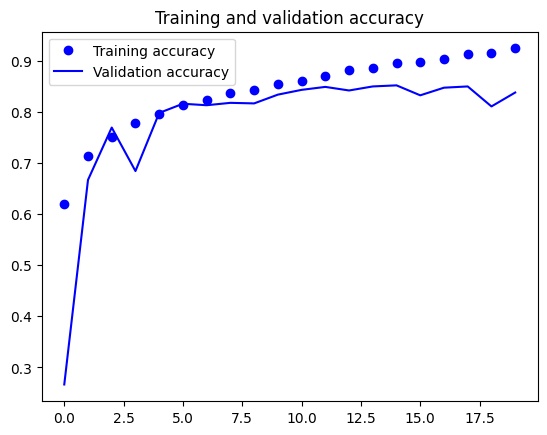

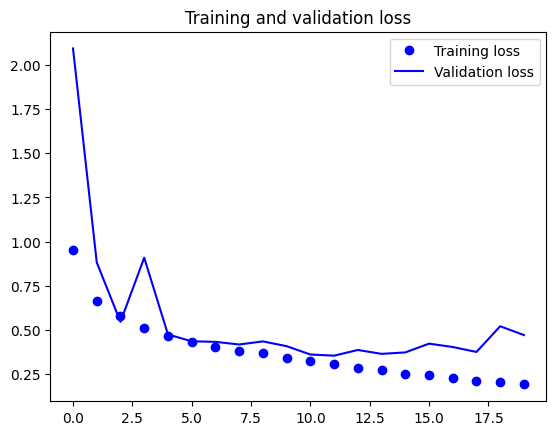

In [21]:
accuracy = riesgo_train.history['accuracy']
val_accuracy = riesgo_train.history['val_accuracy']
loss = riesgo_train.history['loss']
val_loss = riesgo_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes2 = riesgo_model.predict(test_X)

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step


In [23]:
predicted_classes=[]
for predicted_riesgo in predicted_classes2:
    predicted_classes.append(predicted_riesgo.tolist().index(max(predicted_riesgo)))
predicted_classes=np.array(predicted_classes)

In [24]:
predicted_classes.shape, test_Y.shape

((11212,), (11212,))

Found 9372 correct labels


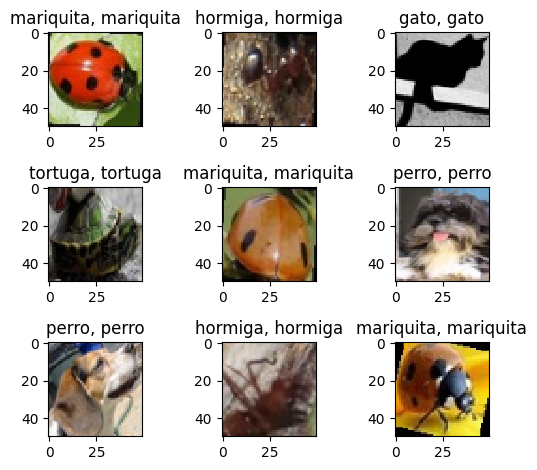

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[correct]],
                                                    sriesgos[test_Y[correct]]))

    plt.tight_layout()

Found 1840 incorrect labels


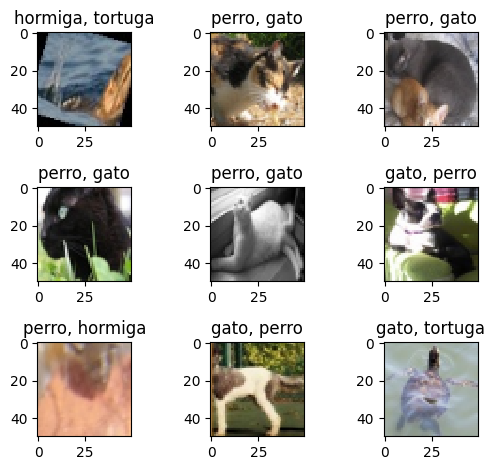

In [26]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    # CAMBIO AQUÍ TAMBIÉN: (50, 50, 3)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[incorrect]],
                                                    sriesgos[test_Y[incorrect]]))
    plt.tight_layout()

In [27]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.60      0.68      2434
     Class 1       0.95      0.97      0.96      1990
     Class 2       0.98      0.98      0.98      2050
     Class 3       0.75      0.74      0.75      2775
     Class 4       0.76      0.97      0.85      1963

    accuracy                           0.84     11212
   macro avg       0.84      0.85      0.84     11212
weighted avg       0.84      0.84      0.83     11212



Probando con la imagen: C:\Users\aleja\DatasetAnimales\perro\perros_auto_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


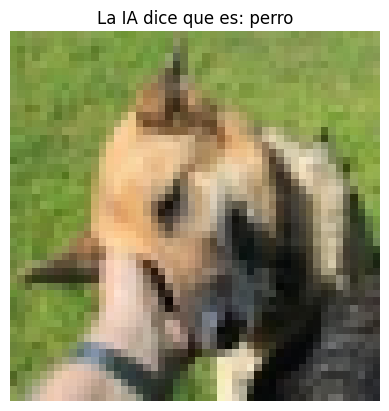

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# 1. Buscamos una imagen real que sí exista en tu carpeta
base_dir = os.path.join(os.path.expanduser("~"), "DatasetAnimales")

# Intentamos tomar la primera foto de la carpeta 'perro' (o la que exista)
# Si no existe 'perro', busca en las otras
imagen_prueba = None
for categoria in ['perro', 'gato', 'tortuga', 'mariquita', 'hormiga']:
    ruta_categoria = os.path.join(base_dir, categoria)
    if os.path.exists(ruta_categoria) and len(os.listdir(ruta_categoria)) > 0:
        # Tomamos el primer archivo que encuentre
        nombre_archivo = os.listdir(ruta_categoria)[2]
        imagen_prueba = os.path.join(ruta_categoria, nombre_archivo)
        break

if imagen_prueba is None:
    print("Error: No encontré ninguna imagen en DatasetAnimales para probar.")
else:
    print(f"Probando con la imagen: {imagen_prueba}")

    # 2. Cargar y procesar
    # Forzamos blanco y negro a color si es necesario
    image = plt.imread(imagen_prueba)
    if len(image.shape) == 2: 
        image = np.stack((image,)*3, axis=-1)

    # IMPORTANTE: Cambiamos a (50, 50) para que coincida con tu nuevo modelo de animales
    image_resized = resize(image, (50, 50, 3), anti_aliasing=True, clip=False, preserve_range=True)
    
    # 3. Predecir
    X = np.array([image_resized], dtype=np.uint8)
    test_X = X.astype('float32') / 255.
    
    predicted_classes = riesgo_model.predict(test_X)
    
    # 4. Resultado
    # sriesgos tiene los nombres de tus carpetas
    prediccion = np.argmax(predicted_classes[0])
    
    # Mostramos la imagen y la predicción
    plt.imshow(image_resized.astype('uint8'))
    plt.title(f"La IA dice que es: {sriesgos[prediccion]}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


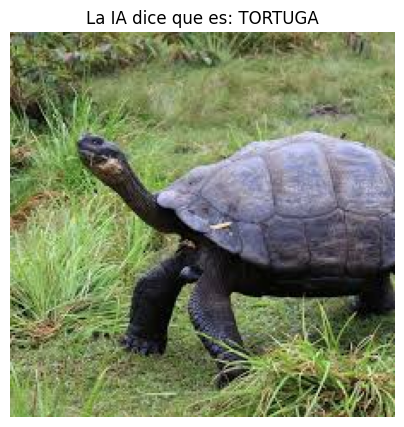

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

ruta_imagen = r"C:\Users\aleja\Downloads\tortuga5.jpg" 

try:
    # 2. CARGAR Y AJUSTAR
    # Es OBLIGATORIO usar target_size=(50, 50) porque así entrenaste la IA
    img_original = image.load_img(ruta_imagen) # Para mostrarla bonita al final
    img = image.load_img(ruta_imagen, target_size=(50, 50))
    
    # 3. PREPROCESAMIENTO
    # Convertimos la imagen en números
    img_array = image.img_to_array(img)
    
    # IMPORTANTE: La IA espera un lote de fotos, no una sola.
    # Agregamos una dimensión extra: de (50, 50, 3) pasa a (1, 50, 50, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # IMPORTANTE: Normalizar (dividir entre 255) igual que en el entrenamiento
    img_array = img_array / 255.0

    # 4. PREDECIR
    prediccion = riesgo_model.predict(img_array)
    indice_ganador = np.argmax(prediccion) # El número más alto de las probabilidades
    
    # 5. OBTENER EL NOMBRE REAL
    # Estas etiquetas deben estar en ORDEN ALFABÉTICO según tus carpetas
    # Si tus carpetas se llaman: gato, hormiga, mariquita, perro, tortuga
    etiquetas = ['gato', 'hormiga', 'mariquita', 'perro', 'tortuga'] 
    
    nombre_resultado = etiquetas[indice_ganador]
    confianza = prediccion[0][indice_ganador] * 100

    # 6. MOSTRAR RESULTADO
    plt.figure(figsize=(5,5))
    plt.imshow(img_original)
    plt.title(f"La IA dice que es: {nombre_resultado.upper()}")
    plt.axis('off')
    plt.show()
    
    # print("Probabilidades completas:", prediccion)

except Exception as e:
    print(f"Error: No se pudo cargar la imagen. Revisa la ruta.\nDetalle: {e}")